In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import math
import numpy as np
import random
import scipy
import pandas as pd
import scipy.spatial.distance as dis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.random as rand
import scipy.stats as stats
import scipy.misc as misc
from collections import Counter
import math
from scipy.special import logsumexp
import seaborn as sns

data = pd.read_csv('MIMIC_CCU.txt') 
#print(data['UrineOutput'])
print(data.columns.values)
data

['#' 'subject_id' 'Acute cerebrovascular disease'
 'Acute myocardial infarction' 'Anemia' 'Atrial fibrillation'
 'Blood Malignancy' 'Chronic kidney disease'
 'Chronic obstructive pulmonary disease and bronchiectasis'
 'Coronary atherosclerosis' 'Diabetes mellitus' 'Heart valve disorders'
 'Hypertension' 'Neoplasms' 'Septicemia' 'Shock' 'icustay_id.x'
 'HeartRate_Min' 'HeartRate_Max' 'HeartRate_Mean' 'SysBP_Min' 'SysBP_Max'
 'SysBP_Mean' 'DiasBP_Min' 'DiasBP_Max' 'DiasBP_Mean' 'MeanBP_Min'
 'MeanBP_Max' 'MeanBP_Mean' 'RespRate_Min' 'RespRate_Max' 'RespRate_Mean'
 'TempC_Min' 'TempC_Max' 'TempC_Mean' 'SpO2_Min' 'SpO2_Max' 'SpO2_Mean'
 'Glucose_Min' 'Glucose_Max' 'Glucose_Mean' 'intime' 'outtime' 'los'
 'gender' 'ANIONGAP_min' 'ANIONGAP_max' 'ALBUMIN_min' 'ALBUMIN_max'
 'BANDS_min' 'BANDS_max' 'BICARBONATE_min' 'BICARBONATE_max'
 'BILIRUBIN_min' 'BILIRUBIN_max' 'CREATININE_min' 'CREATININE_max'
 'CHLORIDE_min' 'CHLORIDE_max' 'GLUCOSE_min' 'GLUCOSE_max'
 'HEMATOCRIT_min' 'HEMATOCRIT_max' '

,#,subject_id,Acute cerebrovascular disease,Acute myocardial infarction,Anemia,Atrial fibrillation,Blood Malignancy,Chronic kidney disease,Chronic obstructive pulmonary disease and bronchiectasis,Coronary atherosclerosis,...,icu_mortality,hospital_mortality,thirty_day_mortality,age,age_group,GCS,SOFA,OASIS,CABG,PCI
0,1,13,0,0,0,0,0,0,0,1,...,0,1,NaN,39.892548,30-39,15.0,1,34,1,0
1,2,18,0,0,0,0,0,0,0,0,...,0,1,NaN,50.875263,50-59,15.0,0,23,0,0
2,3,21,0,1,1,1,0,0,0,1,...,0,1,0.0,87.497293,80-89,13.0,7,36,0,1
3,4,24,0,1,0,0,0,0,0,1,...,0,1,NaN,39.042949,30-39,15.0,0,15,0,1
4,5,25,0,1,0,0,0,0,0,1,...,0,1,NaN,58.989281,50-59,15.0,4,24,0,1
5,6,26,0,0,0,1,0,0,0,1,...,0,1,0.0,72.053798,70-79,15.0,2,22,0,0
6,7,30,0,0,0,0,0,0,0,1,...,0,1,NaN,NaN,NaN,15.0,3,20,0,0
7,8,34,0,0,0,0,0,0,0,1,...,0,1,0.0,NaN,NaN,14.0,3,37,0,0
8,9,38,0,0,0,1,0,0,0,1,...,0,1,NaN,75.991834,70-79,15.0,6,54,0,0
9,10,42,0,0,0,0,0,0,0,1,...,0,1,0.0,61.207645,60-69,15.0,1,23,0,0


In [2]:
data['TropoI_min']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13      30.9
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       0.3
21       NaN
22       NaN
23       NaN
24       NaN
25       5.5
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
6911     NaN
6912     NaN
6913     NaN
6914     NaN
6915     NaN
6916     NaN
6917     NaN
6918     NaN
6919     NaN
6920     NaN
6921     NaN
6922     NaN
6923     NaN
6924     NaN
6925     NaN
6926     NaN
6927     NaN
6928     NaN
6929     NaN
6930     NaN
6931     NaN
6932     NaN
6933     NaN
6934     NaN
6935     NaN
6936     NaN
6937     NaN
6938     NaN
6939     NaN
6940     NaN
Name: TropoI_min, Length: 6941, dtype: float64

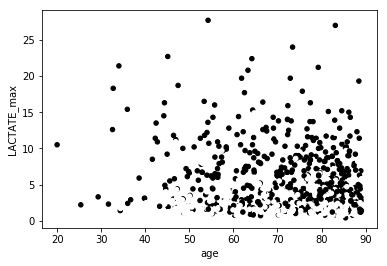

In [3]:
data.plot(kind='scatter', x='age', y='LACTATE_max',color = data['thirty_day_mortality'])
#data.plot(kind='scatter', x='ANIONGAP_max', y='BUN_max',color = data['thirty_day_mortality'])
plt.show()

In [4]:
counter = 0
classC = []
  
for pt in range(len(data)):
    if(data['UrineOutput'][pt]<720 or data['LACTATE_max'][pt] > 2 or data['CREATININE_min'][pt] + 3 < data['CREATININE_max'][pt]
      ):
        counter += 1
        classC.append(pt)
    else:
        data = data.drop(pt, axis=0)
        
print(counter)

data

2307


,#,subject_id,Acute cerebrovascular disease,Acute myocardial infarction,Anemia,Atrial fibrillation,Blood Malignancy,Chronic kidney disease,Chronic obstructive pulmonary disease and bronchiectasis,Coronary atherosclerosis,...,icu_mortality,hospital_mortality,thirty_day_mortality,age,age_group,GCS,SOFA,OASIS,CABG,PCI
1,2,18,0,0,0,0,0,0,0,0,...,0,1,NaN,50.875263,50-59,15.0,0,23,0,0
2,3,21,0,1,1,1,0,0,0,1,...,0,1,0.0,87.497293,80-89,13.0,7,36,0,1
8,9,38,0,0,0,1,0,0,0,1,...,0,1,NaN,75.991834,70-79,15.0,6,54,0,0
12,13,62,0,0,1,0,0,0,0,0,...,0,1,NaN,68.819214,60-69,15.0,4,27,0,0
16,17,94,0,0,0,0,0,0,0,0,...,0,1,0.0,74.484111,70-79,15.0,3,35,0,0
17,18,109,0,0,1,0,0,1,0,0,...,0,1,0.0,24.946969,20-29,15.0,6,38,0,0
18,19,109,0,0,1,0,0,1,0,0,...,0,1,0.0,24.946969,20-29,14.0,6,38,0,0
19,20,111,0,1,0,0,0,0,1,1,...,0,1,0.0,66.817228,60-69,15.0,2,50,0,0
23,24,146,0,1,0,1,0,0,1,1,...,0,1,0.0,85.609618,80-89,15.0,7,33,1,1
29,30,163,0,1,0,0,0,0,1,0,...,0,1,0.0,80.077268,80-89,15.0,4,34,0,0


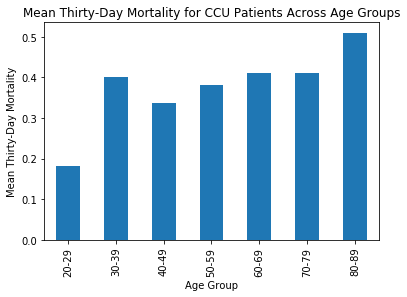

In [5]:
AGE = data.groupby('age_group').mean()['thirty_day_mortality'][1:8]
data.groupby('age_group').mean()['thirty_day_mortality'][1:8].plot(kind='bar')
plt.title("Mean Thirty-Day Mortality for CCU Patients Across Age Groups")
plt.ylabel("Mean Thirty-Day Mortality")
plt.xlabel("Age Group")
plt.savefig('Age', dpi = 300, bbox_inches='tight')

plt.show()
#AGE

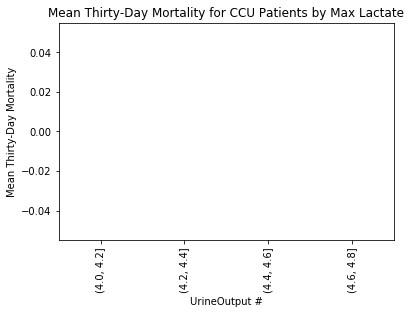

In [6]:

data['UrineOutput #'] =  pd.cut(data['UrineOutput'], np.arange(4,5,.2))
plt.ylabel("Mean Thirty-Day Mortality")
plt.xlabel("Max Lactate in 24hrs Interval")
plt.title("Mean Thirty-Day Mortality for CCU Patients by Max Lactate")
#Sum shows how many patients in each category

data.groupby('UrineOutput #').mean()['icu_mortality'].plot(kind='bar', color = 'green')
plt.savefig('Urine', dpi = 300, bbox_inches='tight')



plt.show()

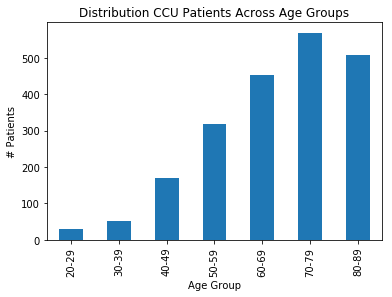

In [7]:
data.groupby('age_group').sum()['hospital_mortality'][1:8].plot(kind='bar')
plt.title("Distribution CCU Patients Across Age Groups")
plt.ylabel("# Patients")
plt.xlabel("Age Group")
plt.savefig('#Age', dpi = 300, bbox_inches='tight')

plt.show()

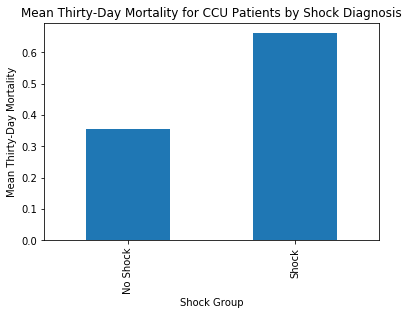

In [8]:
data.groupby('Shock').mean()['thirty_day_mortality'].plot(kind='bar')
plt.ylabel("Mean Thirty-Day Mortality")
plt.xlabel("Shock Group")
plt.title("Mean Thirty-Day Mortality for CCU Patients by Shock Diagnosis")
plt.xticks(np.arange(2), ('No Shock', 'Shock'))
plt.savefig('Shock', dpi = 300, bbox_inches='tight')


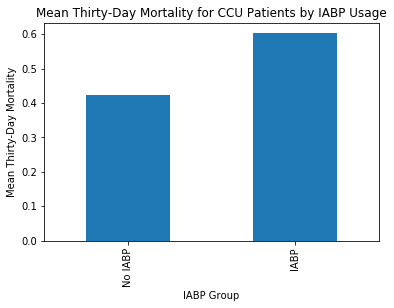

In [9]:
data['IABP'] = data['IABP'].apply(lambda x: x if not np.isnan(x) else 0)
data.groupby('IABP').mean()['thirty_day_mortality'].plot(kind='bar')
plt.ylabel("Mean Thirty-Day Mortality")
plt.xlabel("IABP Group")
plt.title("Mean Thirty-Day Mortality for CCU Patients by IABP Usage")
plt.xticks(np.arange(2), ('No IABP', 'IABP'))
plt.savefig('IABP', dpi = 300, bbox_inches='tight')



In [10]:
#data.groupby('age_group')['#'].nunique().plot(kind='bar')
#plt.title("Age Distribution of Paitients in CCU MIMIC Dataset")

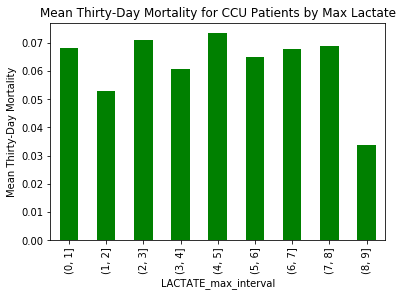

In [11]:

data['LACTATE_max_interval'] =  pd.cut(data['LACTATE_max'], np.arange(0,10,1))
plt.ylabel("Mean Thirty-Day Mortality")
plt.xlabel("Max Lactate in 24hrs Interval")
plt.title("Mean Thirty-Day Mortality for CCU Patients by Max Lactate")
#Sum shows how many patients in each category

data.groupby('LACTATE_max_interval').mean()['icu_mortality'].plot(kind='bar', color = 'green')
plt.savefig('Lactate Mortality', dpi = 300, bbox_inches='tight')

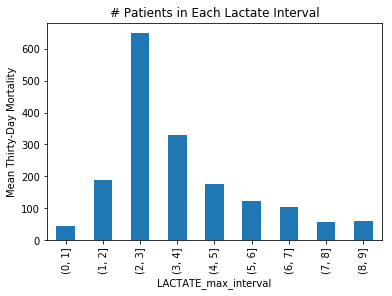

In [12]:
plt.ylabel("Mean Thirty-Day Mortality")
plt.xlabel("Max Lactate in 24hrs Interval")
plt.title("# Patients in Each Lactate Interval")
num = data.groupby('LACTATE_max_interval').sum()['hospital_mortality'].plot(kind='bar')
plt.savefig('Lactate # Patients', dpi = 300, bbox_inches='tight')

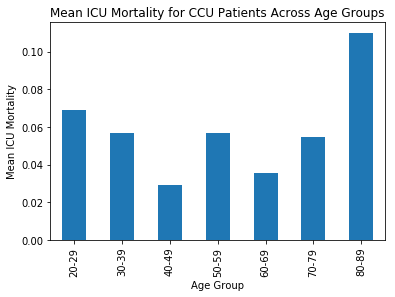

age_group
20-29    0.068966
30-39    0.056604
40-49    0.029240
50-59    0.056782
60-69    0.035242
70-79    0.054482
80-89    0.110020
Name: icu_mortality, dtype: float64

In [13]:
AGE = data.groupby('age_group').mean()['icu_mortality'][1:8]
data.groupby('age_group').mean()['icu_mortality'][1:8].plot(kind='bar')
plt.title("Mean ICU Mortality for CCU Patients Across Age Groups")
plt.ylabel("Mean ICU Mortality")
plt.xlabel("Age Group")
plt.show()

AGE